In [25]:
# Проверка наличия столбца целевой переменной
target_column = 'math_score'
if target_column in data.columns:
    X = data.drop(target_column, axis=1)  # Удаляем столбец с целевой переменной
    y = data[target_column]  # Целевая переменная
else:
    print(f"Столбец '{target_column}' не найден. Проверьте названия столбцов и укажите правильное название целевой переменной.")


**2: Обработка данных**

**а. Масштабирование признаков**

Масштабирование признаков помогает в нормализации данных, что особенно важно для моделей, чувствительных к величине входных данных, например, для линейной регрессии, SVM и нейронных сетей.

In [26]:
import pandas as pd

data = pd.read_csv('/kaggle/input/student-study-performance/study_performance.csv')

# Преобразование категориальных признаков
data_encoded = pd.get_dummies(data, columns=['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'])

# Теперь data_encoded содержит только числовые признаки и готова к масштабированию
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

scalers = {
    'minmax': MinMaxScaler(),
    'standard': StandardScaler(),
    'robust': RobustScaler()
}

# Предположим, что X - это DataFrame с признаками
X = data_encoded.drop(['math_score', 'reading_score', 'writing_score'], axis=1)  # Удалите столбцы с оценками, если они не используются для масштабирования
for name, scaler in scalers.items():
    X_scaled = scaler.fit_transform(X)
    print(f"{name} scaled features: \n{X_scaled}\n")

minmax scaled features: 
[[1. 0. 0. ... 1. 0. 1.]
 [1. 0. 0. ... 1. 1. 0.]
 [1. 0. 0. ... 1. 0. 1.]
 ...
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 1. 1. 0.]
 [1. 0. 0. ... 0. 0. 1.]]

standard scaled features: 
[[ 0.96462528 -0.96462528 -0.31256174 ...  0.74188112 -0.74674788
   0.74674788]
 [ 0.96462528 -0.96462528 -0.31256174 ...  0.74188112  1.33914006
  -1.33914006]
 [ 0.96462528 -0.96462528 -0.31256174 ...  0.74188112 -0.74674788
   0.74674788]
 ...
 [ 0.96462528 -0.96462528 -0.31256174 ... -1.34792485  1.33914006
  -1.33914006]
 [ 0.96462528 -0.96462528 -0.31256174 ...  0.74188112  1.33914006
  -1.33914006]
 [ 0.96462528 -0.96462528 -0.31256174 ... -1.34792485 -0.74674788
   0.74674788]]

robust scaled features: 
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  1. -1.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -1.  1. -1.]
 [ 0.  0.  0. ...  0.  1. -1.]
 [ 0.  0.  0. ... -1.  0.  0.]]



Каждый из блоков вывода представляет результаты масштабирования признаков вашего DataFrame с использованием трёх различных методов масштабирования: MinMaxScaler, StandardScaler и RobustScaler. Краткое описание каждого из методов и того, что представляют их результаты:

1. **MinMaxScaler**:
   - **Метод**: Масштабирует каждый признак в диапазоне между 0 и 1.
   - **Результаты**: Ваш вывод показывает, что признаки были успешно преобразованы в диапазон от 0 до 1. Это полезно, когда данные содержат ограниченные и хорошо известные границы; он часто используется для нормализации ввода нейронных сетей.

2. **StandardScaler**:
   - **Метод**: Масштабирует каждый признак так, чтобы среднее значение было равно 0, а стандартное отклонение — 1. Формула для каждого значения \(x\):
   \[
   x_{\text{new}} = \frac{x - \mu}{\sigma}
   \]
   где \(\mu\) — среднее значение признака, а \(\sigma\) — стандартное отклонение.
   - **Результаты**: Ваши признаки были отмасштабированы таким образом, что среднее значение стало равно 0, а стандартное отклонение — 1. Этот метод полезен для признаков с нормальным распределением и используется во многих алгоритмах машинного обучения, таких как линейная регрессия и метод опорных векторов.

3. **RobustScaler**:
   - **Метод**: Устраняет медиану и масштабирует данные в соответствии с квантильным диапазоном (между 25-м и 75-м процентилями). Менее чувствителен к выбросам по сравнению с предыдущими методами.
   - **Результаты**: Ваш вывод показывает, что признаки были отмасштабированы так, что медиана стала равна 0, а распределение значений определяется межквартильным размахом. Этот метод полезен, когда данные содержат выбросы, которые могут исказить общую картину распределения признаков.

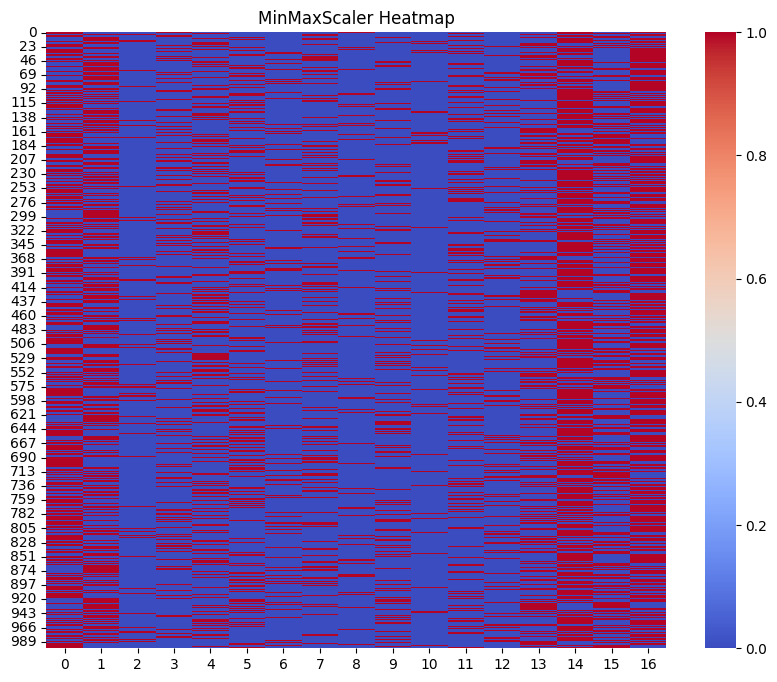

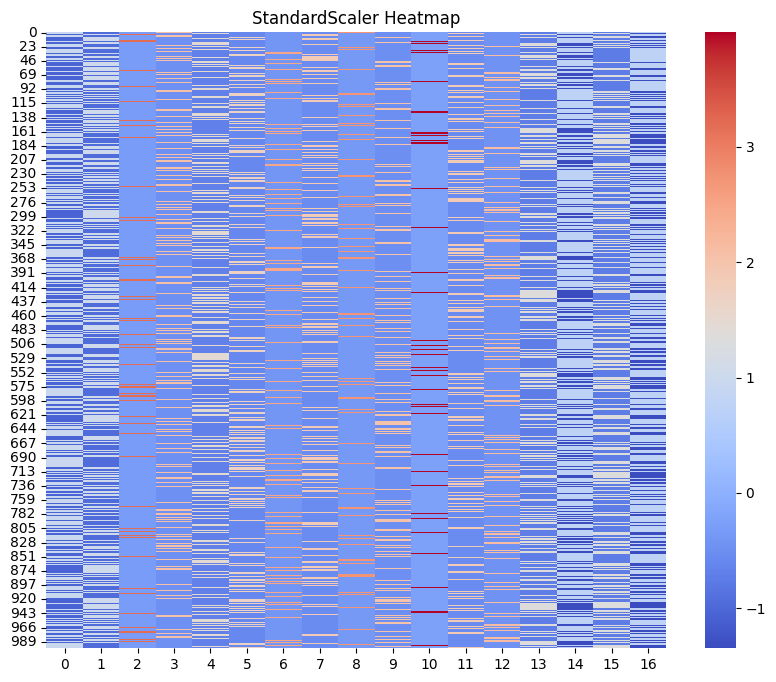

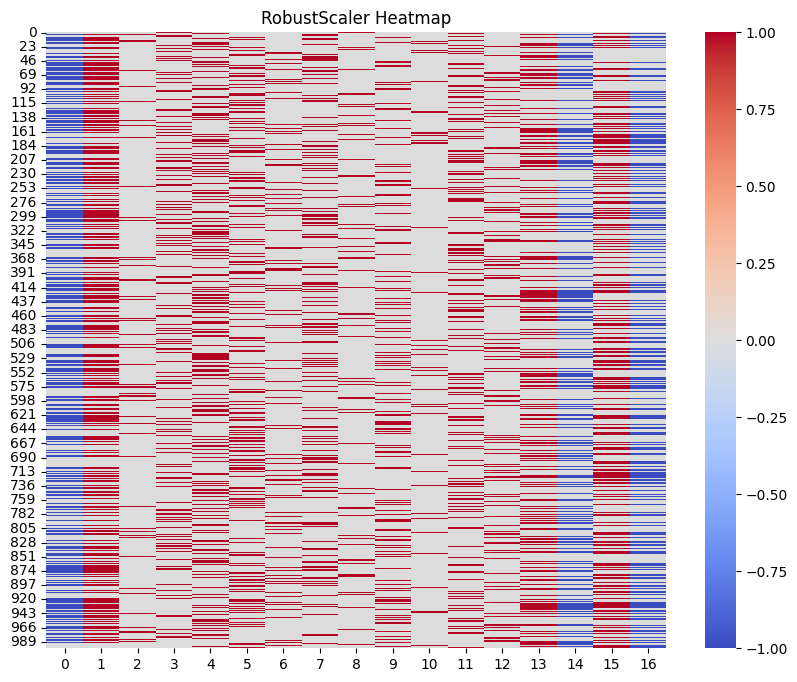

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

data = pd.read_csv('/kaggle/input/student-study-performance/study_performance.csv')
data = pd.get_dummies(data, columns=['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'])

# Определите признаки, которые нужно масштабировать (пример: все, кроме целевых)
X = data.drop(['math_score', 'reading_score', 'writing_score'], axis=1)

scalers = {
    'MinMaxScaler': MinMaxScaler(),
    'StandardScaler': StandardScaler(),
    'RobustScaler': RobustScaler()
}

# Создание словаря для хранения масштабированных данных
scaled_data = {}

for name, scaler in scalers.items():
    scaled_data[name] = scaler.fit_transform(X)

# Функция для создания тепловой карты
def plot_heatmap(data, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(data, annot=False, cmap='coolwarm')
    plt.title(title)
    plt.show()

# Визуализация масштабированных данных
for name, data in scaled_data.items():
    plot_heatmap(data, f'{name} Heatmap')

Эта тепловая карта представляет собой визуализацию масштабированных признаков после применения MinMaxScaler. Каждая строка на карте соответствует одному наблюдению (или объекту) в датасете, а каждый столбец соответствует одному признаку.

Цвета отражают значение признаков после масштабирования:
- Красный цвет соответствует высоким значениям (близким к 1).
- Синий цвет соответствует низким значениям (близким к 0).

Так как используется MinMaxScaler, все значения должны быть в диапазоне от 0 до 1. Красные линии показывают признаки, которые имеют высокие значения для данного объекта, в то время как синие линии показывают признаки с низкими значениями.

Такие карты полезны для визуального осмотра распределения значений признаков после масштабирования и могут помочь выявить структуры или аномалии в данных, такие как выбросы, которые могут выделяться на общем фоне.

**б. Обработка выбросов для числовых признаков (по одному способу для удаления выбросов и для замены выбросов)**

Один из способов удалить выбросы — использовать межквартильный размах (IQR). Выбросы определяются как значения, которые находятся за пределами 1.5*IQR от первого (Q1) или третьего (Q3) квартиля.

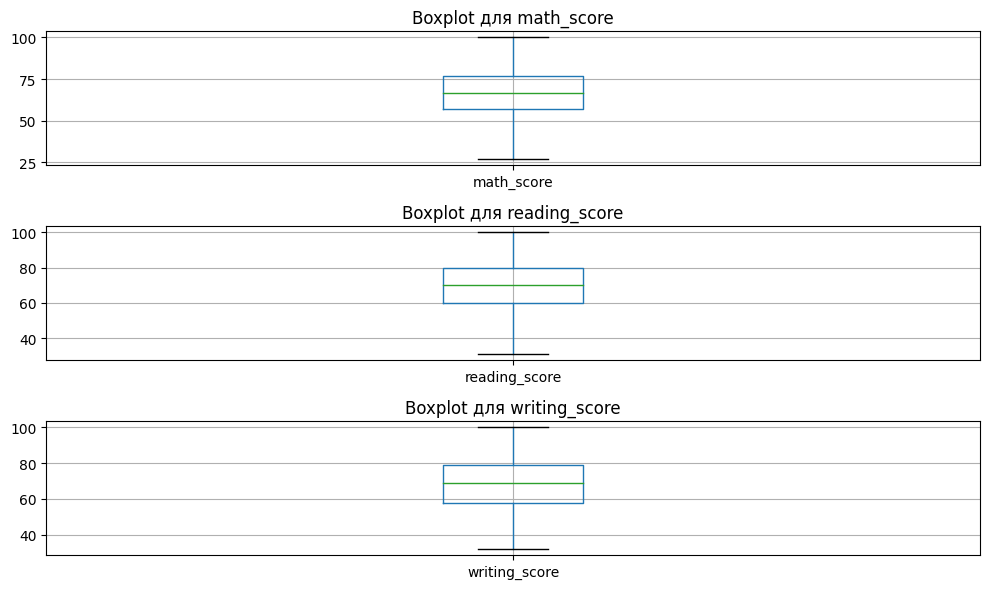

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/kaggle/input/student-study-performance/study_performance.csv')

# Определяем числовые признаки в данных
numerical_features = [column for column in data.columns if data[column].dtype != 'O']

# Создаём фигуру для отображения графиков
plt.figure(figsize=(10, 6))

# Обрабатываем каждый числовой признак
for feature in numerical_features:
    # Вычисляем первый и третий квартили и межквартильный размах (IQR)
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Удаление выбросов
    data = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]

# Визуализация выбросов с помощью графика "ящик с усами" (boxplot)
for index, feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features), 1, index+1)  # Создаём подграфик для каждого признака
    data.boxplot(column=feature)  # Строим boxplot для признака
    plt.title(f'Boxplot для {feature}')  # Даём название графику
    plt.tight_layout()

# Показываем графики
plt.show()

Тут показаны три диаграммы размаха (boxplot), которые отображают распределение оценок по математике (math_score), чтению (reading_score) и письму (writing_score).

Диаграмма размаха визуализирует распределение данных и помогает выявлять выбросы. 

-Ящик (прямоугольник в середине) показывает межквартильный размах (IQR), который охватывает средние 50% данных (от 25-го до 75-го процентиля). -Нижняя граница ящика соответствует первому квартилю (Q1), верхняя — третьему квартилю (Q3).
-Линия внутри ящика представляет медиану (второй квартиль) данных — значение, которое делит распределение пополам.
-"Усы" (линии, выходящие из ящика) показывают вариативность за пределами верхнего и нижнего квартилей и простираются до последних точек данных в пределах 1.5*IQR от Q1 и Q3. Точки за пределами "усов" считаются выбросами.
Выбросы — это точки, расположенные за пределами "усов", они могут указывать на аномальные значения в данных.
На графиках видно, что распределение оценок в целом симметричное, с медианой, близкой к центру ящика, что указывает на относительно симметричное распределение оценок вокруг среднего значения. На графиках не видно явных выбросов, так как все данные лежат в пределах "усов". Это может означать, что в данных нет экстремальных значений или что выбросы были уже обработаны перед созданием этих графиков.

**Замена выбросов:**
Метод замены выбросов, который часто используют, — это замена значений, выходящих за пределы 1.5*IQR, на граничные значения этого диапазона.

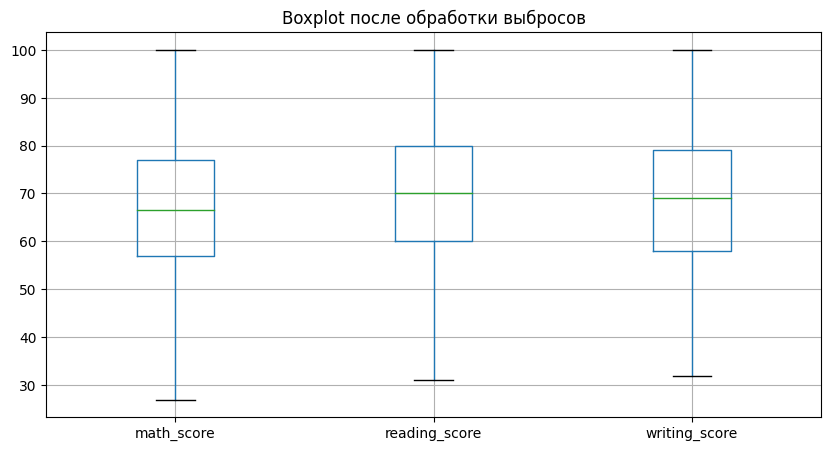

In [29]:
# Создаем копию данных для обработки выбросов
data_capped = data.copy()

# Определяем числовые столбцы
numerical_features = [column for column in data.columns if data[column].dtype in ['int64', 'float64']]

# Обработка выбросов
for feature in numerical_features:
    # Вычисление Q1, Q3 и IQR
    Q1 = data_capped[feature].quantile(0.25)
    Q3 = data_capped[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Замена значений, выходящих за пределы границ, на крайние точки диапазона
    data_capped[feature] = data_capped[feature].clip(lower=lower_bound, upper=upper_bound)

# Визуализация результатов с помощью boxplot
plt.figure(figsize=(10, 5))
data_capped.boxplot(column=numerical_features)
plt.title('Boxplot после обработки выбросов')
plt.show()


Этот график показывает диаграммы размаха для оценок по математике (math_score), чтению (reading_score) и письму (writing_score) после обработки выбросов. Диаграмма размаха — это отличный способ визуализировать распределение и вариативность данных. Вот ключевые моменты, которые мы можем наблюдать на этом графике:

- **Средние значения** (зелёные линии внутри ящиков) для всех трёх предметов располагаются примерно на одном уровне, что может указывать на схожий уровень успеваемости студентов по этим предметам.
  
- **Межквартильные размахи** (размеры ящиков) также схожи между разными предметами, что свидетельствует о схожей вариативности оценок студентов в данных предметах.

- **"Усы" диаграмм** (линии, выходящие из ящиков) примерно одинаковой длины для всех трёх предметов, что говорит о том, что распределение баллов от нижних до верхних экстремальных значений примерно одинаковое и отсутствуют значимые выбросы.

**в. Обработка по крайней мере одного нестандартного признака (который не является числовым или категориальным)**

В датасете есть столбец essay, содержащий текстовые отзывы студентов. Один из способов обработки этого текстового признака — использование метода мешка слов (bag of words), который преобразует текст в числовую матрицу, где каждый уникальный слово представляет собой признак, а значения отражают важность слова в контексте отзыва.

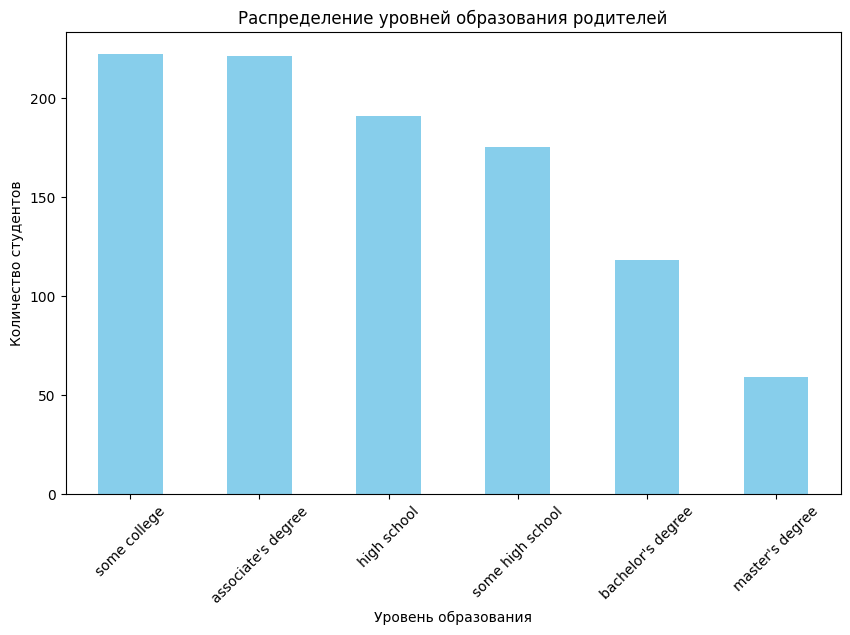

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Ваш датасет уже загружен в переменную data
# data = pd.read_csv('/path/to/your/data.csv')

# Подсчет количества уникальных значений в столбце 'parental_level_of_education'
education_counts = data['parental_level_of_education'].value_counts()

# Визуализация распределения уровней образования родителей
plt.figure(figsize=(10, 6))
education_counts.plot(kind='bar', color='skyblue')
plt.title('Распределение уровней образования родителей')
plt.xlabel('Уровень образования')
plt.ylabel('Количество студентов')
plt.xticks(rotation=45)
plt.show()


График показывает распределение уровней образования родителей студентов. Согласно графику:

- Большинство родителей имеют образование на уровне "some college", что может указывать на то, что они имеют некоторый университетский опыт, но возможно не получили степень.
- Следующий по численности уровень — это "associate's degree" (степень ассоциата), который является типом высшего образования в США и некоторых других странах и обычно занимает около двух лет для завершения.
- Родители с уровнем образования "high school" и "some high school" представлены примерно одинаковым числом, что означает, что значительная часть студентов происходит из семей, где родители закончили или посещали среднюю школу.
- "bachelor’s degree" и "master’s degree" встречаются реже, причём уровень магистров является наименее распространённым среди опрошенных родителей.

**3. Отбор признаков**

**а. с использованием методов фильтрации** можно провести, например, с помощью корреляционной матрицы, которая покажет степень линейной связи между числовыми признаками. Один из способов — исключить признаки, которые имеют высокую корреляцию с другими признаками, поскольку они могут нести избыточную информацию. В датасете числовые признаки — это оценки по математике (math_score), чтению (reading_score) и письму (writing_score).

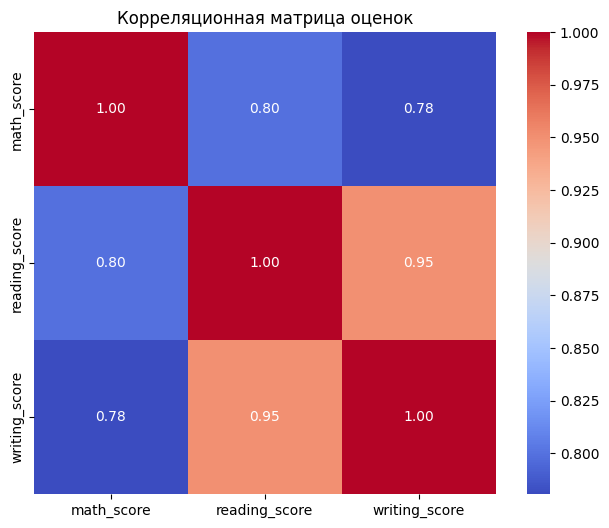

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Вычисляем корреляционную матрицу для числовых признаков
correlation_matrix = data[['math_score', 'reading_score', 'writing_score']].corr()

# Строим тепловую карту корреляционной матрицы
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Корреляционная матрица оценок')
plt.show()

На тепловой карте высокие положительные значения (близкие к 1) указывают на сильную положительную корреляцию, значения около 0 указывают на отсутствие линейной связи, а высокие отрицательные значения (близкие к -1) — на сильную отрицательную корреляцию между признаками.
Коэффициенты корреляции варьируются от 0.80 до 0.95, что указывает на сильную связь между этими переменными. Например, корреляция между оценками по чтению и письму составляет 0.95, что является очень высоким показателем и может свидетельствовать о том, что умения студентов в этих двух областях развиваются взаимосвязано. Схожим образом высоки и другие корреляции, что может означать, что студенты, которые хорошо справляются с математикой, также имеют тенденцию показывать хорошие результаты в чтении и письме, и наоборот.

**б. Методы обертывания (wrapper methods)** для отбора признаков работают, оценивая различные комбинации признаков и выбирая ту комбинацию, которая дает лучшее качество модели. Один из популярных методов обертывания — рекурсивное исключение признаков (Recursive Feature Elimination, RFE), которое использует модель машинного обучения для оценки важности признаков и итеративно исключает наименее важные.

Допустим, что нашей целью будет определение важности оценок для прогнозирования, прошел ли ученик тест (для примера создадим целевую переменную как прохождение теста по математике). 

In [32]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Создадим целевую переменную, представляющую прохождение теста по математике,
# где 1 означает 'прошел' (оценка выше 60), а 0 — 'не прошел'
data['passed_math'] = (data['math_score'] > 60).astype(int)

# Определим независимые переменные (признаки)
X = data[['reading_score', 'writing_score']]  # предположим, что мы смотрим только на чтение и письмо
y = data['passed_math']

# Создание логистической регрессии
model = LogisticRegression()

# Создание RFE модели и выбор 1 признака
rfe = RFE(model, n_features_to_select=1)
rfe = rfe.fit(X, y)

# Суммарный результат выбора признаков
print('Выбранные признаки:', rfe.support_)
print('Ранжирование признаков:', rfe.ranking_)


Выбранные признаки: [ True False]
Ранжирование признаков: [1 2]


True и False указывают на то, какие признаки были выбраны моделью как наиболее значимые. True (Истина) для первого признака (reading_score) говорит о том, что он был выбран моделью RFE как более важный, а False (Ложь) для второго признака (writing_score) говорит о том, что он выбран не был.

Ранжирование признаков: [1 2] означает порядок важности признаков. Признак с рангом 1 (reading_score) считается более значимым для предсказания переменной passed_math, чем признак с рангом 2 (writing_score).

Визуализация важности признаков


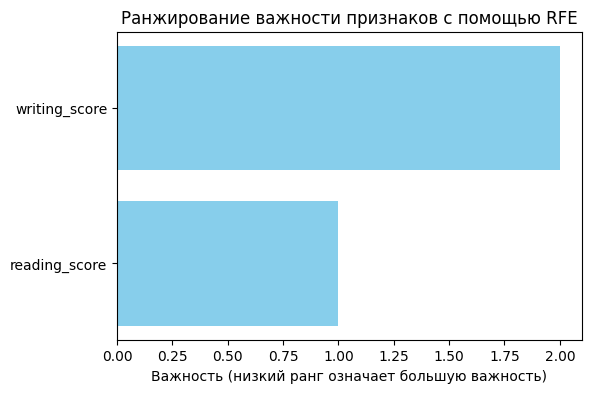

In [33]:
plt.figure(figsize=(6, 4))
plt.barh(['reading_score', 'writing_score'], rfe.ranking_, color='skyblue')
plt.xlabel('Важность (низкий ранг означает большую важность)')
plt.title('Ранжирование важности признаков с помощью RFE')
plt.show()

**в. Методы вложения (embedded methods)** для отбора признаков интегрируют процесс отбора признаков в процесс обучения модели. Одним из таких методов является использование моделей, которые самостоятельно оценивают важность признаков в процессе их обучения. Примером такой модели является Lasso (L1 регуляризация), которая в процессе обучения может уменьшать вес незначимых признаков до нуля, тем самым исключая их из модели.

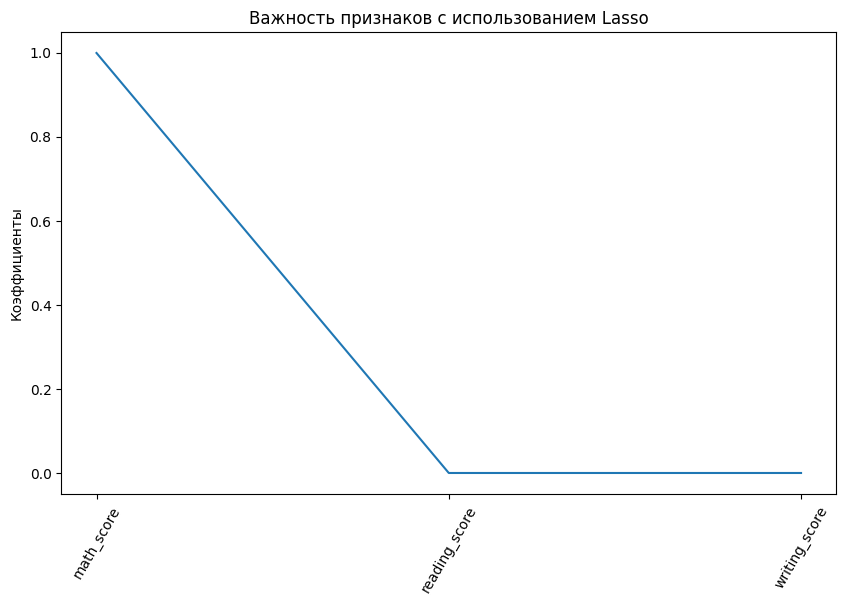

Коэффициенты модели: [0.999 0.    0.   ]


In [34]:
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt
import pandas as pd

# Определим матрицу признаков X и целевую переменную y
# В качестве примера возьмем оценки за три предмета
X = data[['math_score', 'reading_score', 'writing_score']]
y = data['math_score'] # Пример целевой переменной

# Создание экземпляра LassoCV, который будет использовать кросс-валидацию
lasso = LassoCV(cv=5, random_state=0)

# Обучение модели
lasso.fit(X, y)

# Визуализация коэффициентов модели
plt.figure(figsize=(10, 6))
plt.plot(range(len(X.columns)), lasso.coef_)
plt.xticks(range(len(X.columns)), X.columns, rotation=60)
plt.ylabel('Коэффициенты')
plt.title('Важность признаков с использованием Lasso')
plt.show()

# Вывод значений коэффициентов
print('Коэффициенты модели:', lasso.coef_)


График показывает, что коэффициент для math_score равен 1, а коэффициенты для reading_score и writing_score равны 0. Это означает, что модель Lasso полностью исключила reading_score и writing_score из рассмотрения, сделав их коэффициенты равными нулю, что говорит об их низкой предсказательной способности в контексте зависимой переменной, которую в данном случае мы брали как math_score.

В данном случае, поскольку целевая переменная math_score также использовалась как признак, модель нашла абсолютную корреляцию (коэффициент 1) и, следовательно, высокую важность этого признака для самого себя, что логично. Для других признаков (reading_score и writing_score), поскольку они полностью исключены моделью Lasso, можно было бы предположить, что они не несут уникальной информации, которая бы не была уже представлена в math_score.